In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

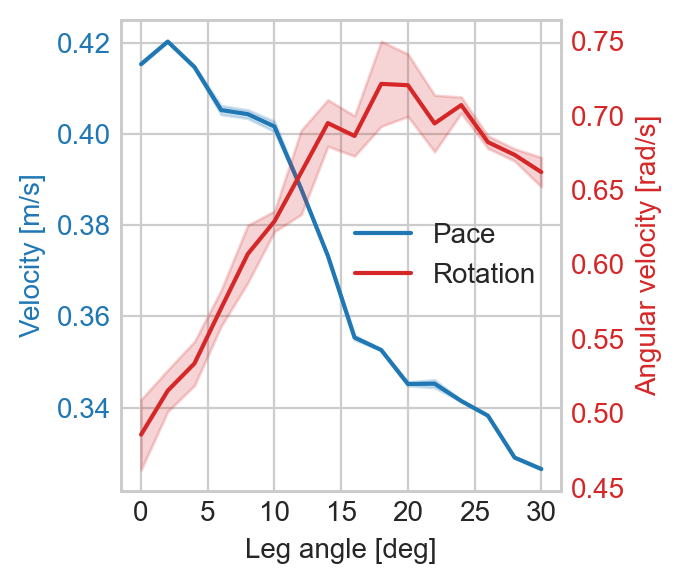

In [20]:
dpi = 100
figsize = (3.5, 3)
# sns.set(rc={"xtick.bottom" : True})

df_pace = pd.read_csv('./vel_alternate.csv')
df_rot = pd.read_csv('./vel_rotate.csv')

colors = ["tab:blue", "tab:red"]
# print(df.head())
fig, ax0 = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
ax1 = ax0.twinx()
axes = [ax0, ax1]

ax1.grid(False)
l0 = sns.lineplot(data=df_pace, x="Leg angle [deg]", y="Velocity [m/s]",
                  ax=ax0, ci="sd", color=colors[0], label="Pace").get_lines()
l1 = sns.lineplot(data=df_rot, x="Leg angle [deg]", y="Angular velocity [rad/s]",
                  ax=ax1, ci="sd", color=colors[1], label="Rotation").get_lines()
for k, ax in enumerate(axes):
    ax.yaxis.label.set_color(colors[k])
    ax.tick_params(axis='y', colors=colors[k])

lines = l0+l1
ax0.legend(lines, [l.get_label() for l in lines],loc='center right')
ax1.get_legend().remove()
plt.xticks(np.arange(0, 31, 5))

plt.tight_layout()

plt.savefig("pace_rotation_vs_leg_angle.png",dpi=600)
plt.show()

<AxesSubplot:xlabel='Leg angle [deg]', ylabel='Velocity [m/s]'>

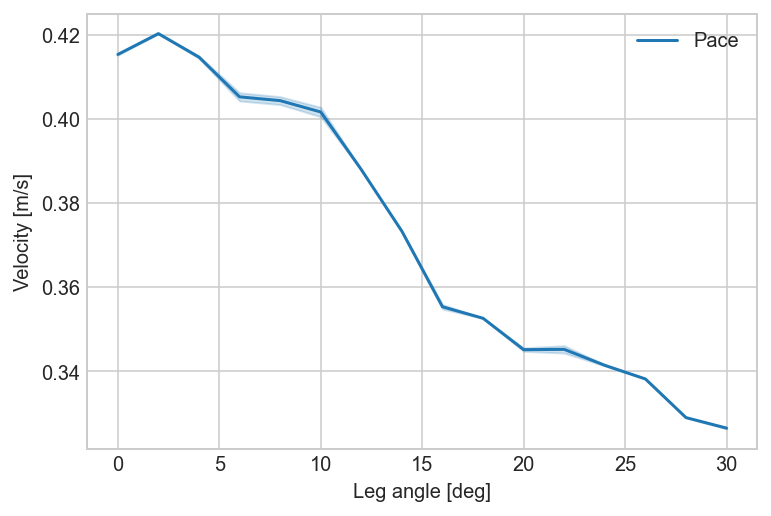

In [17]:
sns.lineplot(data=df_pace, x="Leg angle [deg]", y="Velocity [m/s]", ci="sd", color=colors[0], label="Pace")